# Robert Lisy - Assignment 6

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
- The final regression (#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper.

- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

In [16]:
# import the data, rename the columns.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Statsmodels for us lazy R type people
import statsmodels.api as statsmodels
import statsmodels.formula.api as sm
import statsmodels.tools as tools


df = pd.read_csv('Advertising.csv')
df.columns = ['row_num', 'TV', 'radio', 'newspaper', 'sales']             
df.head()

,row_num,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


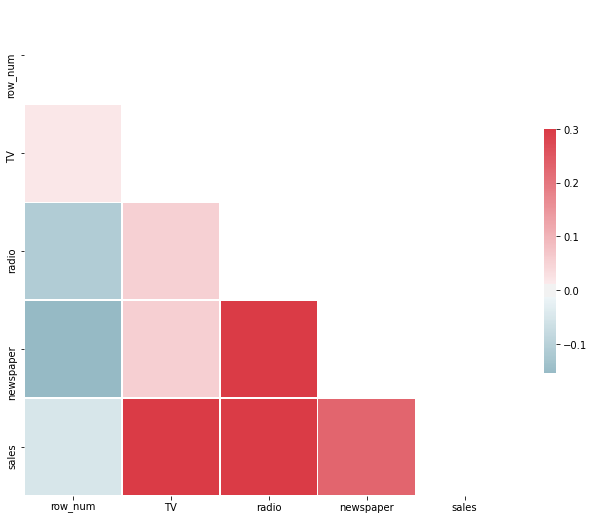

In [2]:
# create the correlation matrix and plot it
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [3]:
def run_linear(x, y, df):
    """
    Run a linear regression on 2 arrays:
    - Produce a labeled graph showing the best fit line with the data points.
    - Interpret both the slope and y-intercept.
    """
    x = np.array(x)
    x = x.reshape(-1, 1)
    y = np.array(y)
    y = y.reshape(-1, 1)
    
    regression_model = LinearRegression() # initialize model
    regression_model.fit(x, y)  # fit (or train) a model
    
    sns.regplot(x=x, y=y, data=df);
    
    print('slope:' ,regression_model.coef_)
    print('intercept:', regression_model.intercept_)
    

slope: [[0.04753664]]
intercept: [7.03259355]


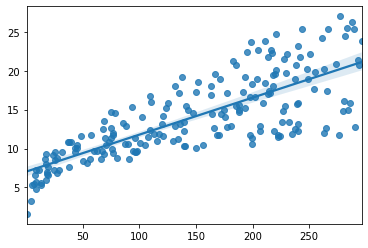

In [4]:
# let's run linear regressions on the 3 single columns
run_linear(x=df['TV'], y=df['sales'], df=df)

### Intrepret sales vs. TV

The slope is .04 meaning that, on average, we'd expect a 1 unit increase in spending on TV advertising to generate $47.53 in increased sales (since sales is in thousands of dollars).

The intercept suggests that, on average if we spend no money on TV, we'd still have $7,032 in sales.

slope: [[0.20249578]]
intercept: [9.3116381]


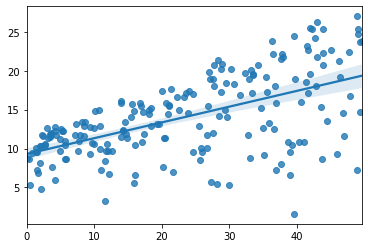

In [5]:
# Radio
run_linear(x=df['radio'], y=df['sales'], df=df)

### Intrepret sales vs. radio

The slope is .20 meaning that, on average, we'd expect a 1 unit increase in spending on TV advertising to generate $202.49 in increased sales (since sales is in thousands of dollars).

The intercept suggests that, on average if we spend no money on TV, we'd still have $9,311 in sales.

slope: [[0.0546931]]
intercept: [12.35140707]


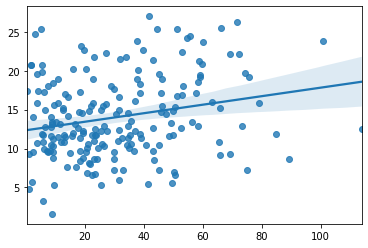

In [6]:
# Newspaper
run_linear(x=df['newspaper'], y=df['sales'], df=df)

### Intrepret sales vs. newspaper

The slope is .05 meaning that, on average, we'd expect a 1 unit increase in spending on TV advertising to generate $54.69 in increased sales (since sales is in thousands of dollars).

The intercept suggests that, on average if we spend no money on TV, we'd still have $12,351 in sales.

# Model with all attributes

Let's make the big kahuna - a model with all attributes predicting sales

In [10]:
ols_model = sm.ols(formula = 'sales ~ TV + radio + newspaper', data = df)
ols_model = ols_model.fit()
print('Intercept = {:6.2f}, Slope = {:6.2f}'.format(*ols_model.params))

Intercept =   2.94, Slope =   0.05


In [11]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.58e-96
Time:                        18:13:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [20]:
df['predicted'] = ols_model.predict(df)
print(f"RMSE is {tools.eval_measures.rmse(df['sales'], df['predicted'])}")

RMSE is 1.6685701407225697


In [21]:
df.head()

,row_num,TV,radio,newspaper,sales,predicted
0,1,230.1,37.8,69.2,22.1,20.523974
1,2,44.5,39.3,45.1,10.4,12.337855
2,3,17.2,45.9,69.3,9.3,12.307671
3,4,151.5,41.3,58.5,18.5,17.597830
4,5,180.8,10.8,58.4,12.9,13.188672


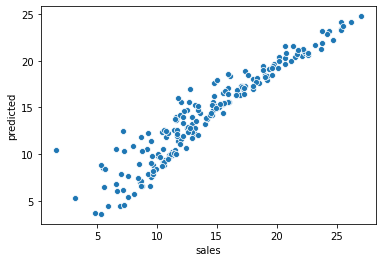

In [23]:
# plot predicted vs actual
sns.scatterplot(df['sales'], df['predicted'])
sns.lineplot()

# lookin NOOOOOIIICCCEEEEE....

# Intrepret the full model

- Intercept of 2.9 means that, on average if we did no advertising, we'd expect \\$2,938 in sales.
- TV slope of .045 means that on average for each unit of spending in TV, we generate \\$45.80 in sales.
- Radio slope of .1885 means that on averge for each unit of spending on radio we generate \\$188.50 in sales.
- Newspaper slope of -.001 means that on average for each unit of spending on newspapers we LOSE \\$1 in sales. 

- The R squared of .897 means that the independant variables can explain 89.7% of the variation of the dependant variable.
- The mean squared error is 1.6685